# Taking absolute sample value and not reject it

In [1]:
from gp import *
import numpy as np
def branin(params):
    x1 = params[0]
    x2 = params[1]
    a = 1.
    b = 5.1 / (4*(np.pi**2))
    c = 5 / np.pi
    r = 6
    s = 10.
    t = 1. / (8.*np.pi)
    ret  = a*(x2-b*(x1**2)+c*x1-r)**2+s*(1-t)*np.cos(x1)+s
    return ret

In [2]:
bounds = np.array([[0, 15], [-5, 15]])
# maxeps specifies how many BOs we want to run
maxeps = 10
# n_iters is number of iterations we want for each run of BO
n_iters = 50
acqui_eva_num = 5
greater_is_better = False
n_pre_samples = 5
coor_sigma = 1 * np.array([0.2,0.2,0.2,0.2])
burn_in = 20
input_dimension = 2
mode = 'MAP'
acqui_mode = 'MCMC'
acqui_sample_num = 5
process_sample_mode = 'abs'
prior_mode ='normal_prior'
likelihood_mode = 'normal_likelihood'

In [3]:
y_list = list()

for i in range(n_iters):
    y_list.append(list())


for j in range(maxeps):
    print ('Running %d episode' % (j + 1))
    xp, yp = bayesian_optimisation(coor_sigma = coor_sigma, 
                                   burn_in = burn_in, 
                                   input_dimension = input_dimension,
                                   n_iters = n_iters, 
                                   sample_loss = branin, 
                                   bounds = bounds, 
                                   n_pre_samples = n_pre_samples, 
                                   acqui_eva_num = acqui_eva_num,  
                                   greater_is_better=greater_is_better, 
                                   mode = mode, 
                                   acqui_mode = acqui_mode, 
                                   acqui_sample_num = acqui_sample_num,   
                                   process_sample_mode = process_sample_mode, 
                                   prior_mode = prior_mode, 
                                   likelihood_mode = likelihood_mode)
    y_train = yp[n_pre_samples:]
    for idx in range(len(y_train)):
        if idx == 0:
            y_list[idx].append(y_train[idx])
        else:
            y_list[idx].append(np.min(y_train[:idx]))

Running 1 episode
Start presampling...
Presampling finished.
25 iterations have been run
50 iterations have been run
Running 2 episode
Start presampling...
Presampling finished.
25 iterations have been run
50 iterations have been run
Running 3 episode
Start presampling...
Presampling finished.
25 iterations have been run
50 iterations have been run
Running 4 episode
Start presampling...
Presampling finished.
25 iterations have been run
50 iterations have been run
Running 5 episode
Start presampling...
Presampling finished.
25 iterations have been run
50 iterations have been run
Running 6 episode
Start presampling...
Presampling finished.
25 iterations have been run
50 iterations have been run
Running 7 episode
Start presampling...
Presampling finished.
25 iterations have been run
50 iterations have been run
Running 8 episode
Start presampling...
Presampling finished.
25 iterations have been run
50 iterations have been run
Running 9 episode
Start presampling...
Presampling finished.
25 

In [4]:
def return_mean_std(y_list):
    mean_list = list()
    std_list = list()
    for one_list in y_list:
        mean_list.append(np.mean(one_list))
        std_list.append(np.std(one_list))
    return mean_list, std_list
mean_list_MCMC, std_list_MCMC = return_mean_std(y_list)

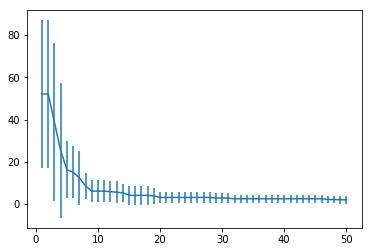

In [5]:
import matplotlib.pyplot as plt
x_MCMC = [i+1 for i in range(len(y_list))]

plt.errorbar(x_MCMC, mean_list_MCMC, yerr = std_list_MCMC, fmt = '-')

plt.show()

In [7]:
import pickle
opt_dict = {}
opt_dict['y_list'] = y_list
with open('branin_exp2_res.pkl','wb') as file:
    pickle.dump(opt_dict, file)

In [8]:
with open('branin_exp2_res.pkl', 'rb') as pickle_file:
    data1 = pickle.load(pickle_file)

In [9]:
data1

{'y_list': [[19.573289038460373,
   74.28703952227886,
   20.27853962443744,
   51.11723454166227,
   111.43194671897948,
   26.893900375379424,
   106.64490641563165,
   5.9047708499428575,
   39.56102547867749,
   65.34715302546007],
  [19.573289038460373,
   74.28703952227886,
   20.27853962443744,
   51.11723454166227,
   111.43194671897948,
   26.893900375379424,
   106.64490641563165,
   5.9047708499428575,
   39.56102547867749,
   65.34715302546007],
  [15.7533132823334,
   18.727696370259274,
   4.45310650456608,
   42.29727055054778,
   111.43194671897948,
   10.043242972054237,
   106.64490641563165,
   5.9047708499428575,
   39.56102547867749,
   31.480805726552482],
  [2.1818782564073897,
   6.68179426027292,
   4.45310650456608,
   42.29727055054778,
   111.43194671897948,
   10.043242972054237,
   22.65851399685625,
   5.152078857275875,
   39.56102547867749,
   8.675376670717123],
  [2.1818782564073897,
   6.68179426027292,
   4.45310650456608,
   42.29727055054778,
   2